<a href="https://colab.research.google.com/github/CarranzaDritte/INTELIGENCIA_ARTIFICIAL_RN_1889205_IMTC_FIME/blob/master/ArbolDeDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Act 5: Árbol de decisión

####Objetivo.- Entrenar un árbol de decisión en python.

####Instrucciones.-
Elaborarlo en una notebook (Colab o Jupyter) y subirlo a su repositorio de Github correspondiente a esta materia.
Utilizar el ejemplo visto en clase como base: 
https://vincentblog.xyz/posts/decision-trees-in-python
https://nbviewer.jupyter.org/github/vincent1bt/Machine-learning-tutorials-notebooks/blob/master/decisionTrees/decisionTreeTutorial1.ipynb 
Utilizar el dataset que vimos en clase en la página kaggle: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv 

Al final entrenaran dos árboles de decisión:
Modelo 1: Sin modificar características del árbol. 
Modelo 2: Modificar la profundidad del árbol de decisión y una característica mas que ustedes quieran. 
Cada modelo deberá mostrar el resultado de su desempeño en términos de exactitud, como en el ejemplo. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier   #librerias de modelo de disicion 
import numpy as np        #para funciones matematicas
import pandas as pd         #para leeer sets de datos 
from sklearn.metrics import accuracy_score

In [ ]:
!wget https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv   #OBTENCION DE DATOS 

--2021-07-09 01:23:51--  https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23875 (23K) [text/plain]
Saving to: ‘diabetes.csv.1’

diabetes.csv.1      100%[===================>]  23.32K  --.-KB/s    in 0.003s  

2021-07-09 01:23:51 (8.18 MB/s) - ‘diabetes.csv.1’ saved [23875/23875]



In [ ]:
dataset=pd.read_csv("diabetes.csv")     #GUARDAR SET DE DATOS EN LA VARIABLE DATASET

In [ ]:
dataset.head()           #SET DE DATOS INICIAL 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.shape      #CUENTA CON 768 FILAS Y 9 COLUMNAS 

(768, 9)

In [ ]:
features = dataset.drop(["Outcome"], axis=1)     # SE QUITA LA COLUMNA OUTCOME
X = np.array(features)              #GUARDAN LOS VALORES EN UN ARREGLO EN NUMPY EN UNA MATRIZ DE 2 DIMENSIONES  DATOS DE ENTRADA
y = np.array(dataset["Outcome"])      #VARIABLE Y ES LA SALIDA, EN NUESRO OUTCOME , TOMAMOS LA VARIABLE INICIAL DATASET Y LLAMAMOS A SOLO LA COMLUMNA DE DATASET

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.20)    # DIVISION A DATOS DE ENTRENAMIENTO  DE MANERA QUE SE ENTRENA EL ARBOL DE DECISION Y DESPUES SE UTILIZA PARA EVALUARLO SI FUE EXITOSO

###CREACION DEL MODELO

In [ ]:
tree = DecisionTreeClassifier()    #GENERAMOS LA ESTRUCTURA DE ARBOL DE DECISION 

In [ ]:
tree.fit(X_train, y_train)   #CREACION DE MODELO, AGREGA LOS DATOS DE ENTRADA 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree.tree_.max_depth    #

13

In [ ]:
validation_prediction = tree.predict(X_val)     #validacion del arbol de decision del arbol entrenado, funcion de prediccion para darle los valores 
training_prediction = tree.predict(X_train)     #

In [ ]:
print('Exactitud training data: ', accuracy_score(y_true=y_train, y_pred=training_prediction))
print('Exactitud validation data: ', accuracy_score(y_true=y_val, y_pred=validation_prediction))

Exactitud training data:  1.0
Exactitud validation data:  0.7922077922077922


###Mostrando el arbol de manera visual 

In [ ]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!pip install graphviz

In [ ]:
import graphviz 
from sklearn.tree import export_graphviz

In [ ]:
feature_names = features.columns

In [ ]:
dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=feature_names,  
                         class_names=True,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)

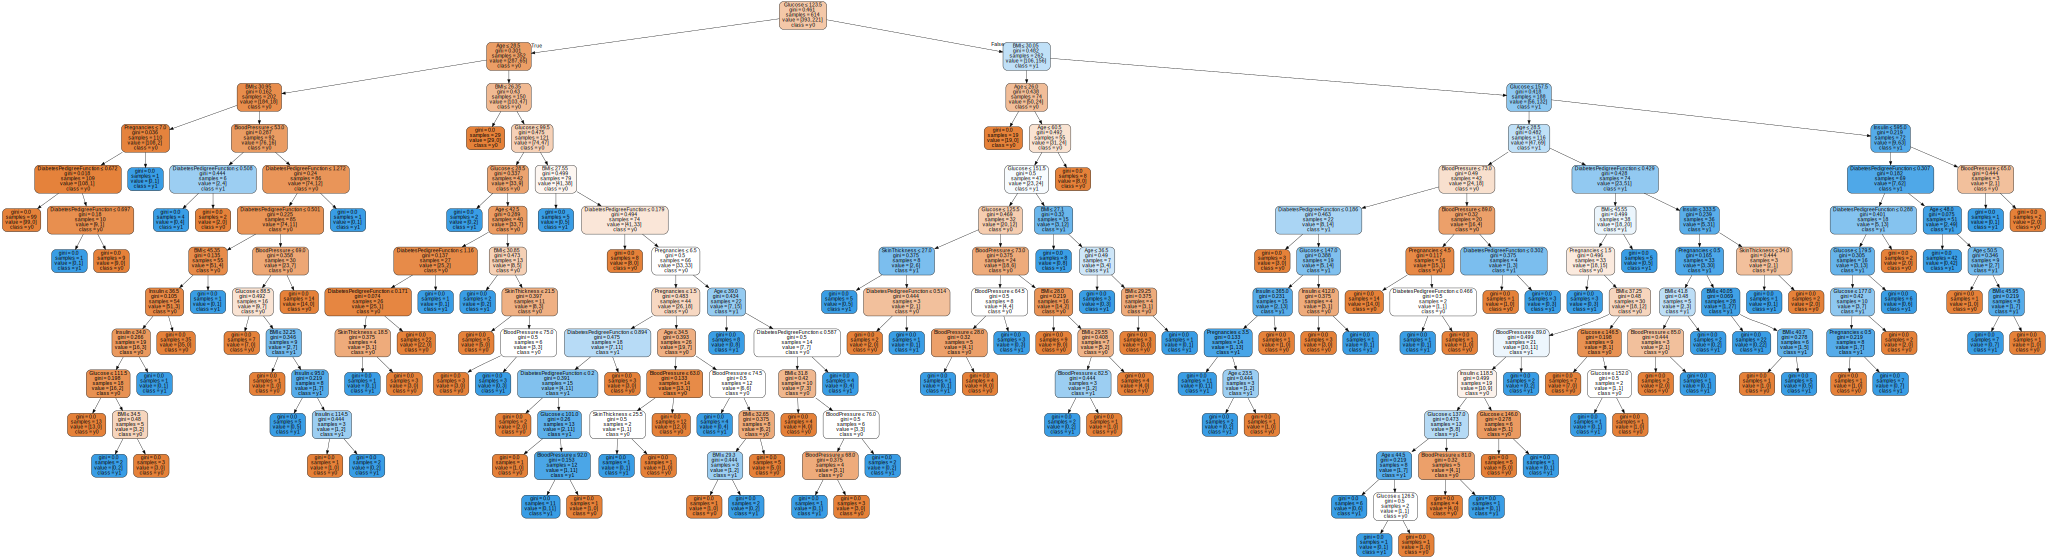

In [ ]:
graph

###Segundo modelo 

In [ ]:
tree = DecisionTreeClassifier(min_samples_leaf=10, max_depth=8, min_samples_split=50)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
validation_prediction = tree.predict(X_val)
training_prediction = tree.predict(X_train)

In [ ]:
print('Exactitud training data: ', accuracy_score(y_true=y_train, y_pred=training_prediction))
print('Exactitud validation data: ', accuracy_score(y_true=y_val, y_pred=validation_prediction))

Exactitud training data:  0.7964169381107492
Exactitud validation data:  0.8116883116883117


In [ ]:
dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=feature_names,  
                         class_names=True,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)

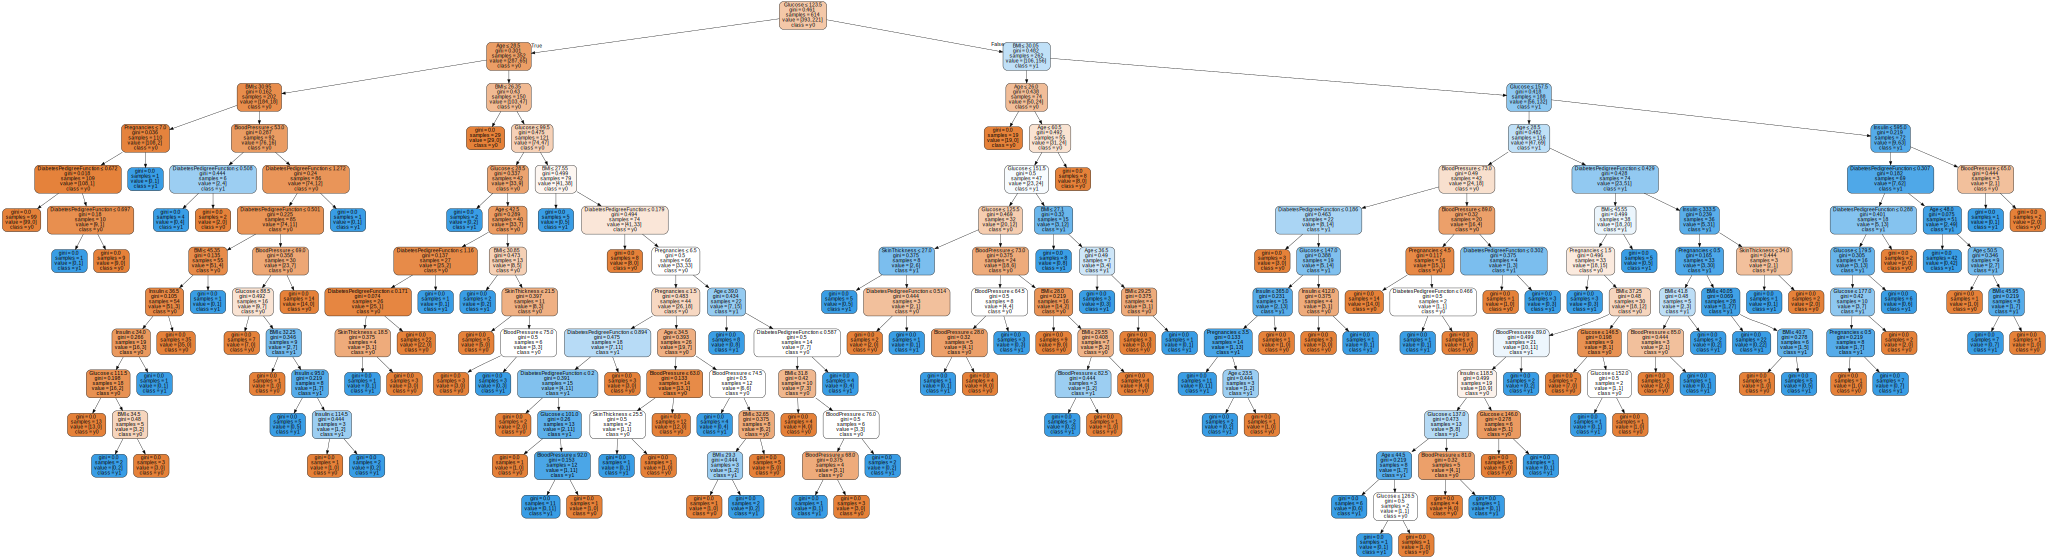

In [ ]:
graph